# Linear Classifiers In Python

## Sickit-learn refresher

In [131]:
import matplotlib.pyplot as plt
import sklearn.datasets as datasets
newsgroups = datasets.fetch_20newsgroups_vectorized()
X, y = newsgroups.data, newsgroups.target

In [52]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1)

knn.fit(X, y)
y_pred = knn.predict(X)
knn.score(X, y)

Model evaluation

In [16]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y)

knn.fit(X_train, y_train)
knn.score(X_test, y_test)

0.67196889360197953

## Logistic regression

In [28]:
from sklearn.linear_model import LogisticRegression #LR is a linear classifier

wine = datasets.load_wine()
X, y = wine.data, wine.target
X_train, X_test, y_train, y_test = train_test_split(X, y)

lr = LogisticRegression()

lr.fit(X_train, y_train)

lr.predict(X_test)

print('score', lr.score(X_test, y_test))

lr.predict_proba(X[:1])

score 0.955555555556


array([[  9.92988098e-01,   6.44046216e-03,   5.71440161e-04]])

### Sentiment analysis for movie reviews

**Movies data set copyrights**

@InProceedings{maas-EtAl:2011:ACL-HLT2011,<br>
  author    = {Maas, Andrew L.  and  Daly, Raymond E.  and  Pham, Peter T.  and  Huang, Dan  and  Ng, Andrew Y.  and  Potts, Christopher},<br>
  title     = {Learning Word Vectors for Sentiment Analysis},<br>
  booktitle = {Proceedings of the 49th Annual Meeting of the Association for Computational Linguistics: Human Language Technologies},<br>
  month     = {June},<br>
  year      = {2011},<br>
  address   = {Portland, Oregon, USA},<br>
  publisher = {Association for Computational Linguistics},<br>
  pages     = {142--150},<br>
  url       = {http://www.aclweb.org/anthology/P11-1015}<br>
}<br>


#### Data preparation

In [58]:
#load IMBD vocabulary
import pandas as pd
vocabulary = pd.read_csv('./data/imdb.vocab', header=None).values.flatten()

In [85]:
import glob
import os
def loadTxtFile(filePath) : 
    return " ".join(open(filePath, 'r', encoding="utf-8").readlines()).replace("<br />", "").replace("<br/>", "")

def concatenateFilesInDir(path):
    allFiles = glob.glob(os.path.join(path, "*.txt"))
    return [loadTxtFile(filePath) for filePath in allPosFiles] 

In [100]:
posPath = './data/train/pos'
negPath = './data/train/neg'
posList = concatenateFilesInDir(posPath)
negList = concatenateFilesInDir(negPath)

reviews = posList
reviews.extend(negList)

len(reviews)

2000

In [121]:
y = [1 for x in range(1000)]
y.extend([-1 for x in range(1000)])

#let us shuffle the data!
from sklearn.utils import shuffle
reviews, y = shuffle(reviews, y)

In [122]:
#Convert a collection of text documents to a matrix of token counts
#CountVectorizer implements both tokenization and occurrence counting in a single class

from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words=None,
        strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
        tokenizer=None, vocabulary=vocabulary)

# Let’s use it to tokenize and count the word occurrences of a minimalistic corpus of text documents:
X = vectorizer.fit_transform(reviews)
    
    
def get_features(review):
    return vectorizer.transform([review])

In [126]:
lr = LogisticRegression()

X_train, X_test, y_train, y_test = train_test_split(X, y)

lr.fit(X_train, y_train)

print(lr.score(X_test, y_test))

# Predict sentiment for a glowing review
review1 = "LOVED IT! This movie was amazing. Top 10 this year."
review1_features = get_features(review1)
print("Review:", review1)
print("Probability of positive review:", lr.predict(review1_features))
print("Probability of positive review:", lr.predict_proba(review1_features)[0,1])
# Predict sentiment for a poor review
review2 = "Total junk! I'll never watch a film by that director again, no matter how good the reviews."
review2_features = get_features(review2)
print("Review:", review2)
print("Probability of positive review:", lr.predict(review2_features))
print("Probability of positive review:", lr.predict_proba(review2_features)[0,1])

0.528
Review: LOVED IT! This movie was amazing. Top 10 this year.
Probability of positive review: [-1]
Probability of positive review: 0.482481903959
Review: Total junk! I'll never watch a film by that director again, no matter how good the reviews.
Probability of positive review: [-1]
Probability of positive review: 0.258981008493


## Basic SVM Classifier - LinearSVC

In [119]:
wine = datasets.load_wine()
X, y = wine.data, wine.target
X_train, X_test, y_train, y_test = train_test_split(X, y)
from sklearn.svm import LinearSVC

svm = LinearSVC()

svm.fit(X_train, y_train)

svm.score(X_test, y_test)

0.80000000000000004

In [120]:
""" This model is overfitting, since it is complex and gives low test accuracy !!! """
from sklearn.svm import SVC #non linear 

svm = SVC()

svm.fit(X_train, y_train)

print(svm.score(X_train, y_train))
print(svm.score(X_test, y_test))

1.0
0.444444444444


## Linear classifiers and decision boudaries 

In [1]:
from utils import plot_classifier
import matplotlib.pyplot as plt
def plot_4_classifiers(X, y, clfs):

    # Set-up 2x2 grid for plotting.
    fig, sub = plt.subplots(2, 2)
    plt.subplots_adjust(wspace=0.2, hspace=0.2)

    for clf, ax, title in zip(clfs, sub.flatten(), ("(1)", "(2)", "(3)", "(4)")):
        # clf.fit(X, y)
        plot_classifier(X, y, clf, ax, ticks=True)
        ax.set_title(title)
    plt.show()

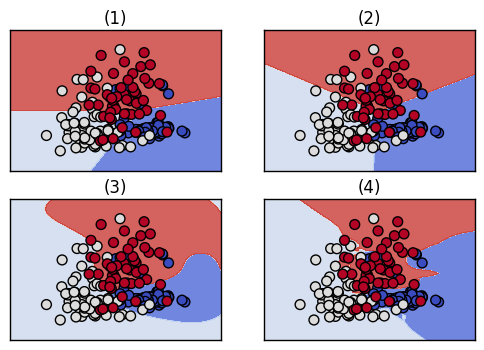

In [4]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.neighbors import KNeighborsClassifier
import numpy as np 

import sklearn.datasets as datasets

wine = datasets.load_wine()
X = wine.data[:, 0:2]
y = wine.target

# Define the classifiers
classifiers = [LogisticRegression(), LinearSVC(), SVC(), KNeighborsClassifier()]

# Fit the classifiers
for c in classifiers:
    c.fit(X, y)

# Plot the classifiers
plot_4_classifiers(X, y, classifiers)
plt.show()

## Linear classifiers: the coefficients

In [65]:
def get_coeff(lr, data):
    return lr.coef_ @ data + lr.intercept_

1
0
[ 6.93910894]
[-1.39648224]


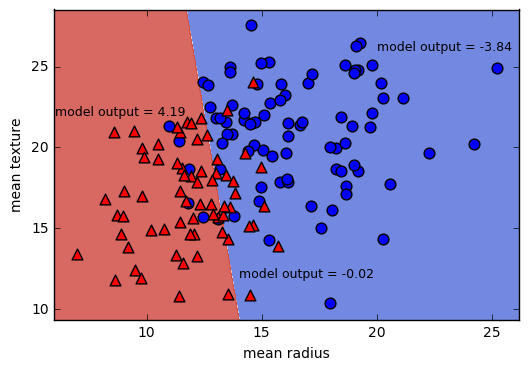

In [104]:
data = datasets.load_breast_cancer()

X = data.data
y = data.target

lr = LogisticRegression()
lr.fit(X, y)

print(lr.predict(X)[63])
print(lr.predict(X)[5])

print(get_coeff(lr, X[63])) #positive raw model output ==> 1
print(get_coeff(lr, X[5])) #negative raw model output ===> 0

#to make the plot simplier we gonna work on only 2 features to see the desicion boudary.

X = X[:150, 0:2]
y = y[:150]
lr.fit(X, y)

ax = plt.gca()
plot_classifier(X, y, lr,ax =ax  , ticks=False)
ax.text(20, 26, 'model output = ' + "{0:.2f}".format(get_coeff(lr, np.array([25,25]))[0]), fontsize=9) #very negative
ax.text(6, 22, 'model output = ' + "{0:.2f}".format(get_coeff(lr, np.array([1,1]))[0]), fontsize=9) #very positive
ax.text(14, 12, 'model output = ' + "{0:.2f}".format(get_coeff(lr, np.array([14,10]))[0]), fontsize=9) #close to zero
plt.xlabel(data.feature_names[0])
plt.ylabel(data.feature_names[1])

plt.show()

## What is a loss function?
- Error square 
- Logisitic loss for logisitic regression
- Hinge loss for SVM

We need to minimize the loss function

In [108]:
from scipy.optimize import minimize

#minimize square function, with 0 as initial guess!
minimize(np.square, 50).x

array([ -4.01004193e-07])

## Ploting  loss function

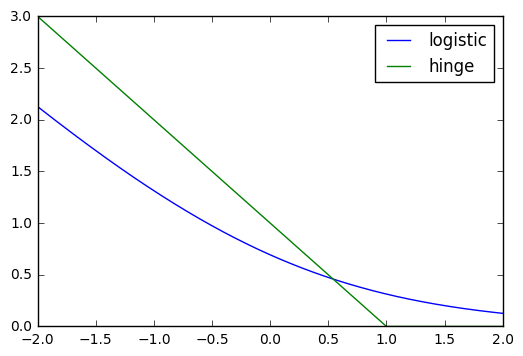

In [110]:
# Mathematical functions for logistic and hinge losses
# Feel free to ignore if you're not interested
def log_loss(raw_model_output):
   return np.log(1+np.exp(-raw_model_output))
def hinge_loss(raw_model_output):
   return np.maximum(0,1-raw_model_output)

# Create a grid of values and plot
grid = np.linspace(-2,2,1000)
plt.plot(grid, log_loss(grid), label='logistic')
plt.plot(grid, hinge_loss(grid), label='hinge')
plt.legend()
plt.show()

## Logistic regression and regularization